Import the library

In [10]:
import pyvinecopulib as pv
import numpy as np

Create an independence bivariate copula

In [11]:
pv.Bicop()

<pyvinecopulib.Bicop>
Bivariate copula: 
  family = Independence
  rotation = 0
  var_types = c,c

Create a Gaussian copula
See help(pv.BicopFamily) for the available families

<pyvinecopulib.Bicop>
Bivariate copula: 
  family = Gaussian
  rotation = 0
  var_types = c,c
  parameters = 0.5



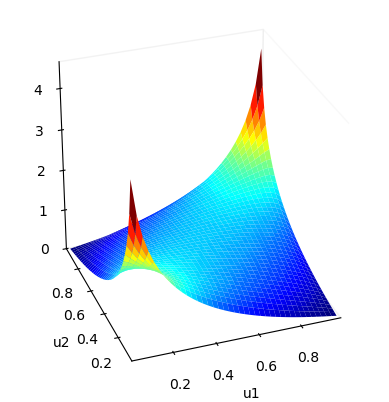

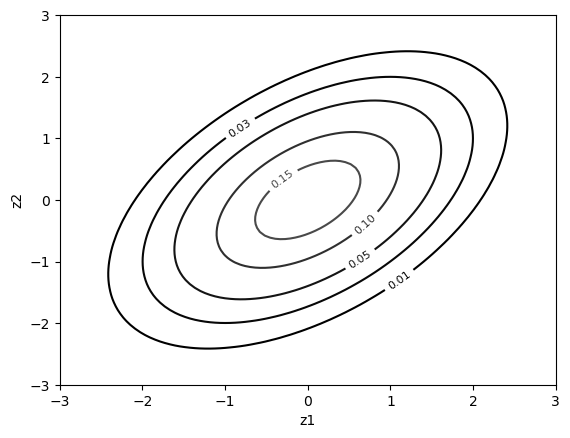

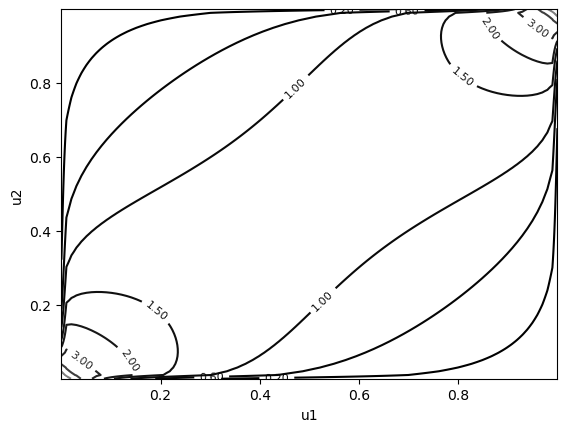

In [12]:
cop = pv.Bicop(family=pv.BicopFamily.gaussian, parameters=np.array([[0.5]]))
print(cop)
cop.plot()  # surface plot of copula density
cop.plot(type="contour", margin_type="norm")  # contour plot with normal margins
cop.plot(type="contour", margin_type="unif")  # contour plot of copula density

Create a 90 degrees rotated Clayon copula with parameter = 3

In [13]:
pv.Bicop(
  family=pv.BicopFamily.clayton, rotation=90, parameters=np.array([[3.0]])
)

<pyvinecopulib.Bicop>
Bivariate copula: 
  family = Clayton
  rotation = 90
  var_types = c,c
  parameters = 3

Create a t copula with correlation of 0.5 and 4 degrees of freedom
and showcase some methods

In [14]:
cop = pv.Bicop(family=pv.BicopFamily.student, parameters=np.array([[0.5], [4]]))
u = cop.simulate(n=10, seeds=[1, 2, 3])
fcts = [
  cop.pdf,
  cop.cdf,
  cop.hfunc1,
  cop.hfunc2,
  cop.hinv1,
  cop.hinv2,
  cop.loglik,
  cop.aic,
  cop.bic,
]
[f(u) for f in fcts]

[array([0.7092173 , 0.4810942 , 0.81301356, 1.39839611, 2.0873499 ,
        2.79384106, 1.11748814, 0.55365742, 1.94610848, 0.80483478]),
 array([0.13932915, 0.28749817, 0.18307038, 0.61323437, 0.0331152 ,
        0.0193519 , 0.40936082, 0.18184118, 0.78248955, 0.14523531]),
 array([0.8170847 , 0.11345477, 0.12286857, 0.78638305, 0.10872534,
        0.35645124, 0.77472657, 0.90877192, 0.76413881, 0.77807695]),
 array([0.08241333, 0.96386291, 0.79699695, 0.52499938, 0.39444021,
        0.09401172, 0.33903085, 0.08152695, 0.71452328, 0.09953434]),
 array([0.39910753, 0.58076221, 0.32192543, 0.81770422, 0.04078053,
        0.0190836 , 0.65748713, 0.58895048, 0.92393781, 0.37153588]),
 array([0.26444729, 0.79267514, 0.44179055, 0.79869798, 0.04211888,
        0.01956738, 0.59671571, 0.3699726 , 0.92303602, 0.26213502]),
 0.7849333316959906,
 2.430133336608019,
 3.0353035225961107]

Different ways to fit a copula...

In [15]:
u = cop.simulate(n=1000, seeds=[1, 2, 3])

# Create a new object an sets its parameters by fitting afterwards
cop2 = pv.Bicop(pv.BicopFamily.student)
cop2.fit(data=u)
print(cop2)

# Otherwise, define first an object to control the fits:
#    - pv.FitControlsBicop objects store the controls
#    - here, we only restrict the parametric family
#    - see help(pv.FitControlsBicop) for more details
# Then, create a copula from the data
controls = pv.FitControlsBicop(family_set=[pv.BicopFamily.student])
print(controls)
cop2 = pv.Bicop.from_data(data=u, controls=controls)
print(cop2)

<pyvinecopulib.Bicop>
Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.52
 4.1

<pyvinecopulib.FitControlsBicop>
Family set: Student
Parametric method: mle
Nonparametric method: constant
Nonparametric multiplier: 1
Weights: no
Selection criterion: bic
Preselect families: yes
mBIC prior probability: 0.9
Number of threads: 1

<pyvinecopulib.Bicop>
Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.52
 4.1



Similarly, when the family is unkown,
there are two ways to also do model selection...

In [16]:
# Create a new object an selects both its family and parameters afterwards
cop3 = pv.Bicop()
cop3.select(data=u)
print(cop3)

# Or create directly from data
cop3 = pv.Bicop.from_data(data=u)
print(cop3)

<pyvinecopulib.Bicop>
Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.52
 4.1

<pyvinecopulib.Bicop>
Bivariate copula: 
  family = Student
  rotation = 0
  var_types = c,c
  parameters = 0.52
 4.1

